In [1]:
from google.colab import files
uploaded = files.upload()

Saving SAheart.data to SAheart.data


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

In [3]:
# to read dataset
heart = pd.read_csv('SAheart.data')
heart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


## Replacing non-number data with a reasonable numerical representation

In [4]:
heart['famhist'].replace(to_replace=['Absent','Present'],value=[0,1],inplace=True)
heart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [5]:
heart.isnull().sum()# missing values

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    int64  
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 39.8 KB


In [7]:
# because Will not need row.names i dropped it
heart=heart.drop('row.names',axis =1)
heart

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


##  Train a logistic regression to tell if a patient has high risk of CHD or not.

In [8]:
# extracting explanatory and response variables
x = heart.drop(['chd'], axis=1)
y = heart['chd']
# Split the targets into training/testing sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [9]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0,solver = 'lbfgs', multi_class = 'auto')
# Train the model using the training sets
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [10]:
# Make predictions using the testing set
ypred = classifier.predict(xtest)
ypred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0])

In [11]:
#confusion_matrix
con_mat = confusion_matrix(ytest,ypred)
print(con_mat)

[[68  9]
 [23 16]]


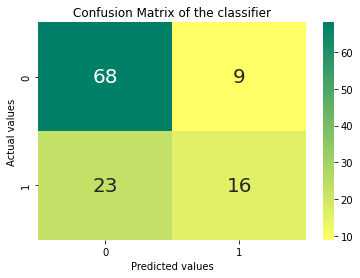

In [12]:
sns.heatmap(con_mat,annot=True,annot_kws = {'size':20},cmap = 'summer_r',xticklabels = np.unique(heart.chd),
            yticklabels=np.unique(heart.chd))
plt.title('Confusion Matrix of the classifier')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [13]:
# Accuracy
print('Accuracy: ',accuracy_score(ytest,ypred))

Accuracy:  0.7241379310344828


### You can trust this model at $72\%$

## Identify if the a patient with the following data is of high risk or not

# Prediction

### If we get $ 1$ means a patient has  high risk, for $0 $ there is no high risk

In [14]:
# no high risk
h=[[133,3.3,4.6,34.5,1,52,30,32,20]]
ypred = classifier.predict(h)
print('The patient has ',ypred)

The patient has  [0]


### There is no high risk for this patient to be affected

In [15]:
# high risk
h1=[[160,12,5.73,23.11,1,49,25.3,97.2,52]]
ypred = classifier.predict(h1)
ypred

array([1])

##  Which are the most determinant factors for heart disease?

In [16]:
Coefficients = classifier.coef_[0]
print('Coefficients: \n', Coefficients)

Coefficients: 
 [-0.01248022  0.09921857  0.09909474  0.06596406  0.74918224  0.02433889
 -0.16400293 -0.00235057  0.03324091]


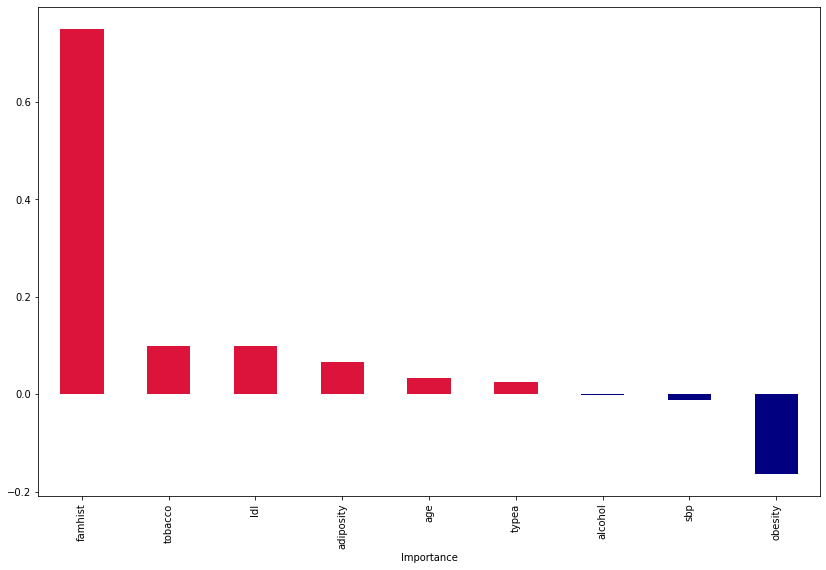

In [17]:
list1 = [i for i in  Coefficients]
List1 = list(x.columns)
data1 = pd.DataFrame()
data1['Feature'] = List1
data1['Importance'] = list1
data1 = data1.sort_values(by=['Importance'], ascending=False)
data1['Positive'] = data1['Importance']>0
data1 = data1.set_index('Feature')
data1.Importance.plot(kind='bar', figsize=(14, 9), color=data1.Positive.map({True:"crimson", False:"navy"}))
plt.xlabel("Importance")
plt.show()

##### By considering the graph above we see that the family history is the most important feature for heart disease. Apart from the family history also  Low density lipoprotein cholesterol level  and tobacco.   